In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

In [2]:
from stable_baselines3 import PPO

In [6]:
BASE_PATH = '../../models/cnn/'
BASE_PATH2 = '../../initial_model'

In [7]:

model = PPO.load(os.path.join(BASE_PATH, f'PPO_CnnPolicy_model'))

X = np.load(os.path.join(BASE_PATH, f'PPO_CnnPolicy_observations.npy'))

X = torch.Tensor(X)
X.shape

torch.Size([286, 1, 1, 15, 7])

In [8]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

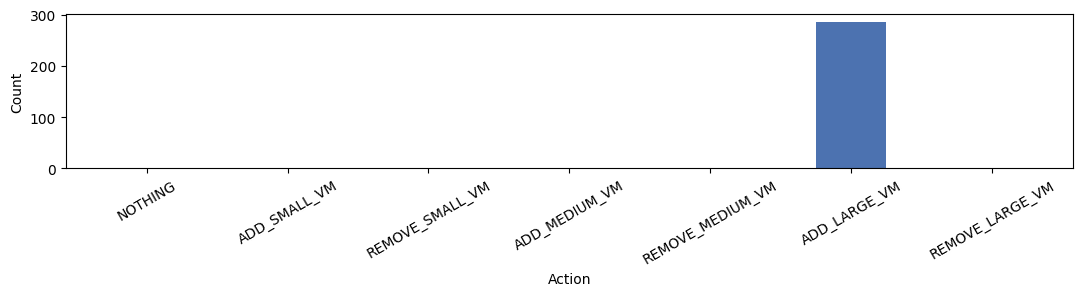

In [9]:
plot_action_histogram(predictions)

# Attributions

In [10]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [11]:
x = torch.tensor(X[10])
ppo_net.forward(x)

c:\Users\ultramarine\.conda\envs\trainloop_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-1.0968]], grad_fn=<AddmmBackward0>)

In [12]:
# Random samples
N = 2000
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)

# Mean Attributions

In [14]:

mean_attributions_per_action = ig_attributor.get_mean_attributions()

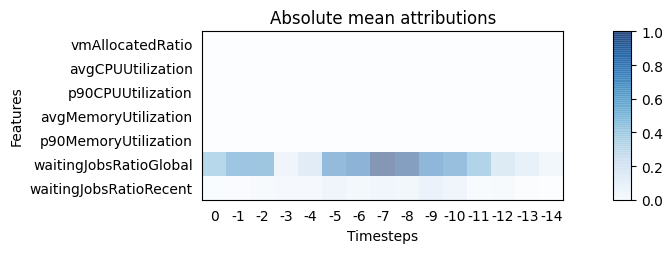

In [15]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], policy='cnn', abs=True)

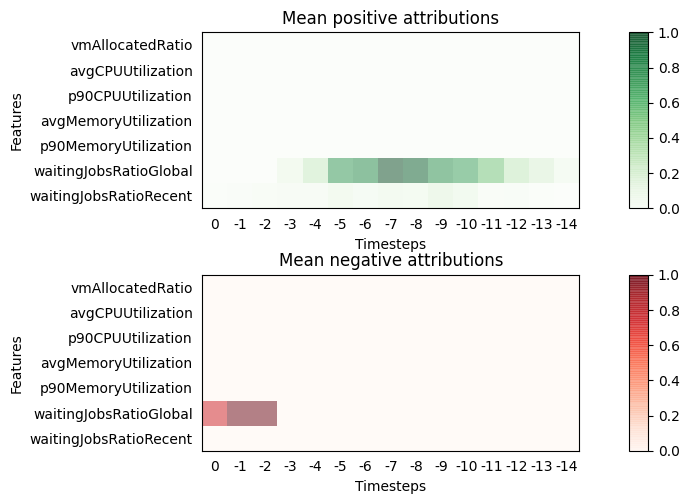

In [12]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], policy='cnn')

# Attributions for examples

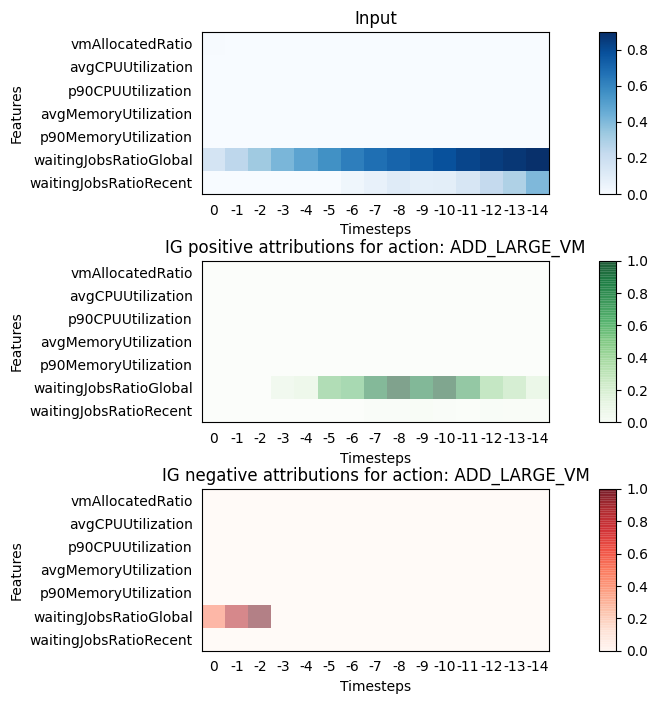

In [13]:
ig_attributor.explain_example(4)

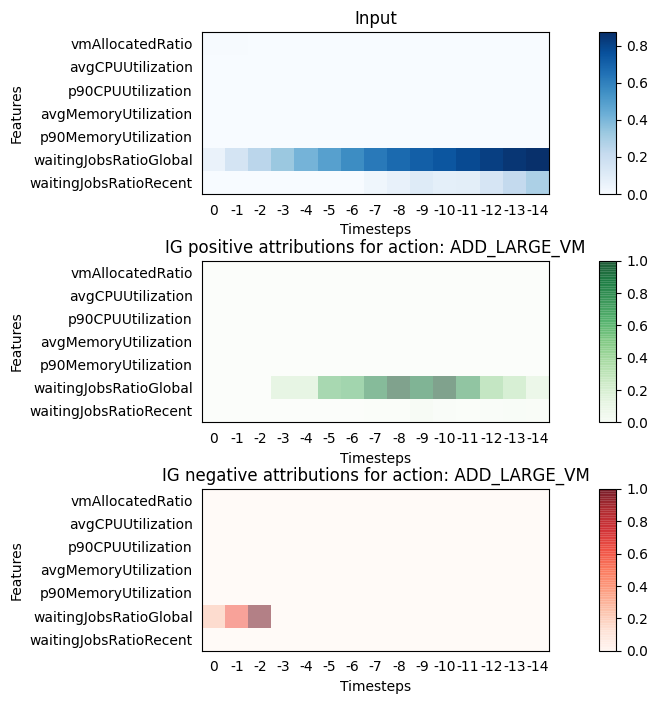

In [14]:
ig_attributor.explain_example(300)

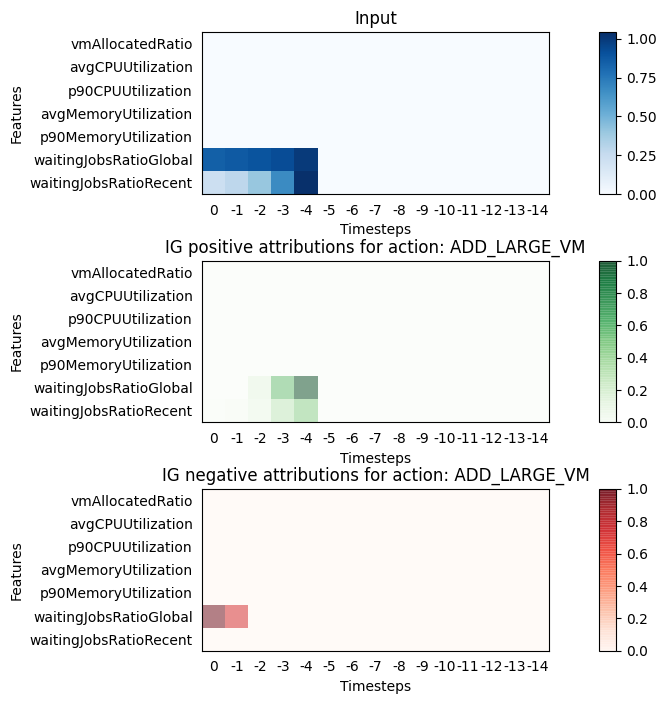

In [15]:
ig_attributor.explain_example(330)

In [17]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_LARGE_VM': 286,
 'ADD_MEDIUM_VM': 0,
 'ADD_SMALL_VM': 0,
 'NOTHING': 0,
 'REMOVE_LARGE_VM': 0,
 'REMOVE_MEDIUM_VM': 0,
 'REMOVE_SMALL_VM': 0}


In [18]:
idx = action_observation_map['REMOVE_SMALL_VM'].squeeze(1)[:500]

In [19]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx])

IndexError: index 0 is out of bounds for dimension 0 with size 0

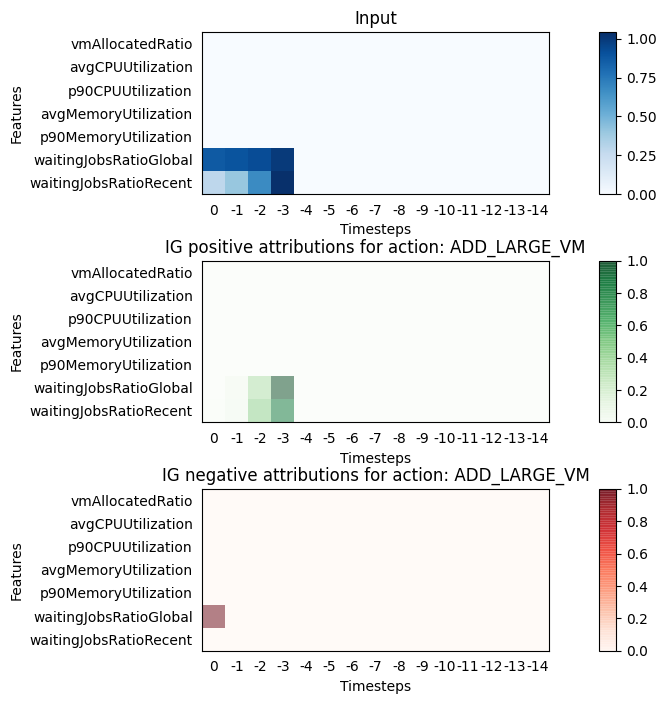

In [20]:
ig_attributor.explain_example(idx=1)